# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [2]:
data = pd.read_csv("customers.csv")

df = pd.DataFrame(data)

# 3. Initial Data Exploration

In [3]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,PurchaseCategory
0,101,Male,23,40000,60,Clothing
1,102,Female,31,50000,70,Electronics
2,103,Female,35,62000,90,Groceries
3,104,Male,22,35000,50,Clothing
4,105,Female,45,80000,80,Electronics


In [4]:
# Check for missing values
print(df.isnull().sum())

CustomerID          0
Gender              0
Age                 0
AnnualIncome        0
SpendingScore       0
PurchaseCategory    0
dtype: int64


# 4. Visualize Gender Distribution

In [5]:
# Count the number of male and female customers
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      5
Female    5
Name: count, dtype: int64

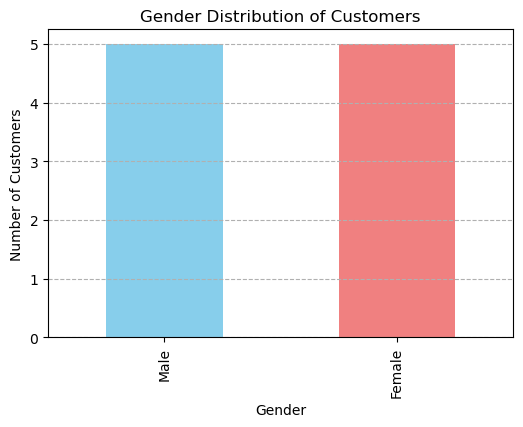

In [23]:
# Plot the gender distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

# 5. Analyze Spending Score by Gender

In [7]:
# Group by Gender and calculate average spending score
avg_spending_by_gender = df.groupby('Gender')['SpendingScore'].mean().reset_index()
avg_spending_by_gender

,Gender,SpendingScore
0,Female,77.8
1,Male,54.6


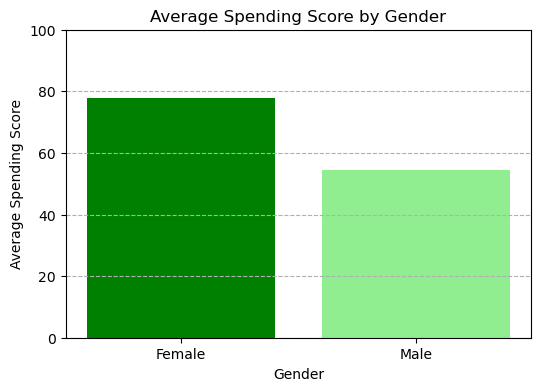

In [8]:
# Visualize the average spending score by gender
plt.figure(figsize=(6, 4))
plt.bar(avg_spending_by_gender['Gender'], avg_spending_by_gender['SpendingScore'], 
        color=['green', 'lightgreen'])

plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()

# 6. Explore Relationship Between Age and Spending Score

In [11]:
# Group by Age and calculate spending score
spending_by_age = df.groupby('Age')['SpendingScore'].value_counts()
spending_by_age

Age  SpendingScore
22   50               1
23   60               1
27   72               1
29   68               1
31   70               1
33   77               1
35   90               1
41   65               1
45   80               1
52   30               1
Name: count, dtype: int64

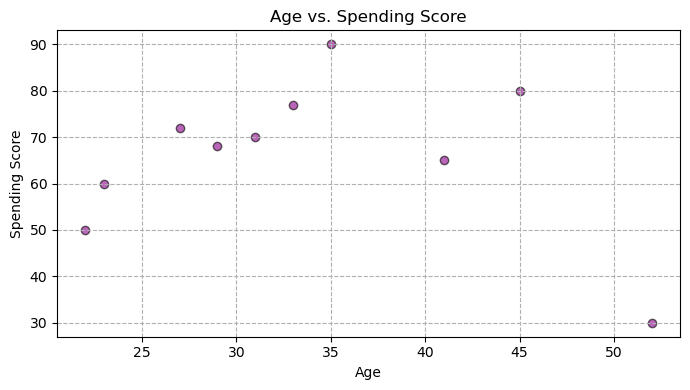

In [20]:
plt.figure(figsize=(7, 4))
plt.scatter(df['Age'], df['SpendingScore'], alpha=0.6, c='darkmagenta', edgecolors='k')

plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# 7. Category-Wise Spending Analysis

In [38]:
# Group by Purchase Category and calculate total spending score
category_spending = df.groupby('PurchaseCategory')['SpendingScore'].mean().sort_values(ascending=False)

category_spending

PurchaseCategory
Electronics    71.666667
Groceries      65.666667
Clothing       62.500000
Name: SpendingScore, dtype: float64

In [39]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(category_spending['PurchaseCategory'], category_spending['SpendingScore'], color='mediumslateblue')

plt.title('Total Spending by Purchase Category')
plt.xlabel('Category')
plt.ylabel('Sum of the Spending')
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()

KeyError: 'PurchaseCategory'

<Figure size 800x500 with 0 Axes>

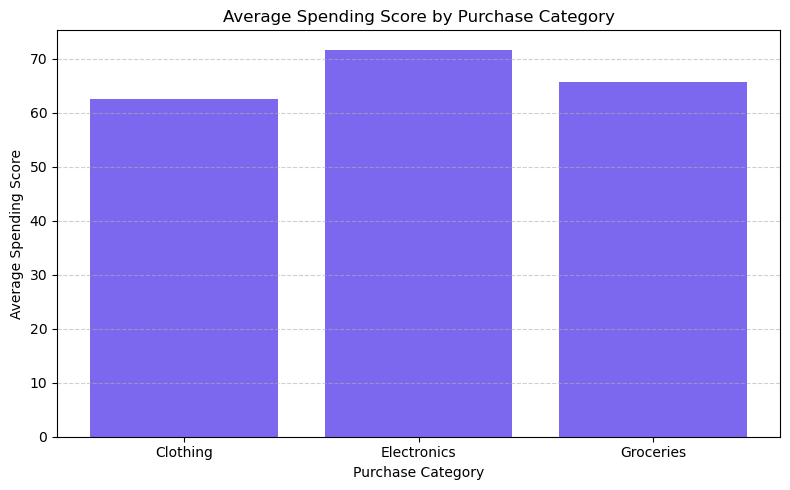

In [40]:
# Step 2: Clean column names just in case
df.columns = df.columns.str.strip()

# Step 3: Group by PurchaseCategory and calculate average SpendingScore
category_spending = df.groupby('PurchaseCategory')['SpendingScore'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.bar(category_spending['PurchaseCategory'], category_spending['SpendingScore'], color='mediumslateblue')

plt.title('Average Spending Score by Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Average Spending Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 8. Add More Analysis (Optional)

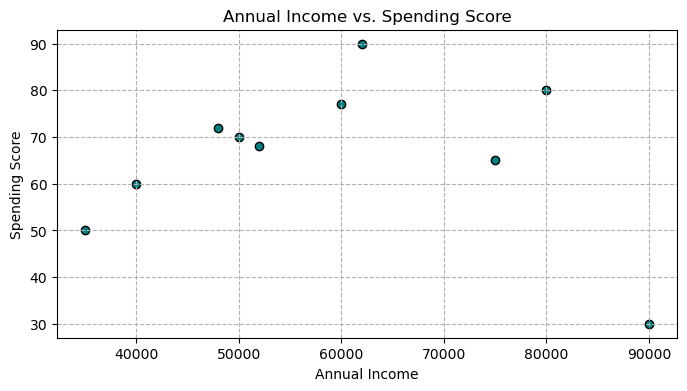

In [42]:
# 1. Compare Income vs Spending (Scatter Plot)

plt.figure(figsize=(8, 4))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], color='teal', edgecolors='k')

plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True, linestyle='--')
plt.show()

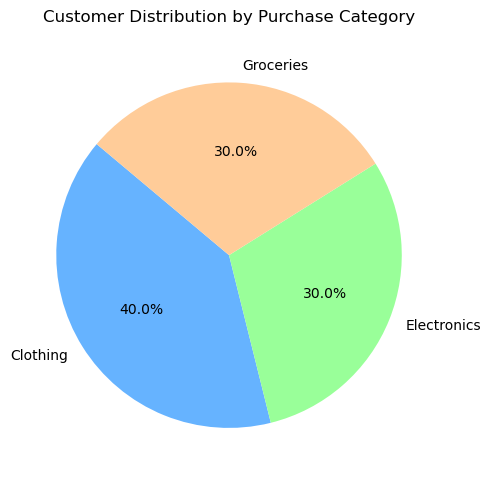

In [44]:
# 2. Pie Chart of Purchase Category Distribution

category_counts = df['PurchaseCategory'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Distribution by Purchase Category')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()

# Conclusion